In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import DataReader
from pandas import Series, DataFrame

In [2]:
# 予想したい日の前日
filedate = '20220415'
# 機械学習累積データ作成日
filedateAC = '20220415'

In [3]:
# 予想のために作成したinputデータ（予想したい日の前日）
df_inputai_c = pd.read_csv('data/inputAI2_' + filedate + '.csv', index_col=0, header=[0], parse_dates=[0])

In [4]:
# 事前に作成した機械学習用データ（機械学習累積データ作成日）
df_target = pd.read_csv('data/inputAIAC2_' + filedateAC + '.csv', index_col=0, header=[0], parse_dates=[0])

In [5]:
# ここからscikit-learn用のデータクラスを持つオブジェクトを作る
import sklearn

In [6]:
stockanalysis = sklearn.utils.Bunch()

In [7]:
# Key_xを削除
df_target = df_target.drop('key_x', axis=1)

In [8]:
# 当日の前日比'Diff'を目的変数"target"とする
stockanalysis['target'] = df_target['Diff_y']

In [9]:
# 説明変数を"data"に入れる
stockanalysis['data'] = df_target.iloc[:, 0:389]

In [10]:
# 特徴量の名前も入れておく
# stockanalysis['feature_names'] = ['PER', 'PBR', 'HAITO',
#                                  'ROE', 'ROA', 'MA05',
#                                  'MA25', 'MA75', 'RSI',
#                                  'AdjClose', 'Close', 'High',            
#                                  'Low', 'Open', 'Volume',           
#                                  'INDR4', 'TSPLB', 'TSPLS',
#                                  'PIN80B', 'PIN80S', 'Diff']

In [11]:
# 訓練セットとテストセットに分割
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
stockanalysis['data'], stockanalysis['target'], random_state=0)

In [12]:
# データ読み込み完了
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(27797, 389) (9266, 389) (27797,) (9266,)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lreg = LinearRegression()

In [15]:
# fitでモデルを作りますが、使うのは学習用のデータだけです。
lreg.fit(X_train, Y_train)

LinearRegression()

In [16]:
# 回帰係数
print(lreg.coef_)
# 切片（誤差）
print(lreg.intercept_)
# 決定係数
print(lreg.score(X_train, Y_train))

[ 9.39031796e-06 -6.01918332e-04 -3.92539502e-03 -8.82775824e-06
  1.59357857e-04 -6.00057178e-04 -4.92234331e-04 -8.21466274e-05
  3.14616249e-04 -2.07603040e-05 -2.65563410e-06  2.46676146e-05
  6.55585736e-06 -5.40283212e-06 -2.39959569e-10  3.92050802e-05
 -5.99304669e-05 -1.15722244e-05  2.83963921e-05 -1.32055523e-05
  2.38492633e-10  5.48010716e-03 -5.47725785e-03  1.80742173e-05
 -8.34143716e-06 -1.16689994e-05 -9.41273744e-11 -3.64205508e-03
  3.63434325e-03  3.13222698e-05  2.25402635e-05 -2.32252108e-05
  1.74823408e-10 -1.09030158e-02  1.09014041e-02  2.50353784e-06
  6.25677171e-06 -9.20015405e-06 -3.50526211e-10  7.97541124e-03
 -7.96034686e-03 -1.33708092e-05 -2.55340536e-05  1.59946508e-05
 -3.64994846e-10  1.05617164e-03 -1.07209150e-03  1.07597273e-05
  2.84478100e-05 -2.95596202e-05 -5.36942896e-11  6.50053688e-04
 -6.23364609e-04 -1.03053397e-05 -3.07905720e-05  1.31003953e-05
  4.12741435e-10 -6.62937631e-04  6.62980551e-04  5.26096579e-08
  8.29452103e-06 -5.86631

In [17]:
# 予測を、学習用のデータと、テスト用のデータ、両方でやる。
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [18]:
print('X_trainを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean(((Y_train - pred_train)*100) ** 2)))
    
print('X_testを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean(((Y_test - pred_test)*100) ** 2)))

X_trainを使ったモデルの平均二乗誤差＝3525.65
X_testを使ったモデルの平均二乗誤差＝11073.55


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Text(0.5, 1.0, 'Residual Plots')

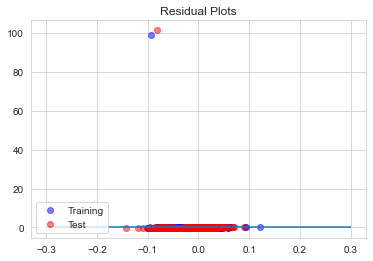

In [20]:
# 学習用のデータの残差プロットです。
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用のデータの残差プロットです。
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# y=0の水平な線を描いておきます。
plt.hlines(y=0,xmin=-0.3,xmax=0.3)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

In [21]:
# Key_xを削除
df_analysis = df_inputai_c.drop('key', axis=1)

In [22]:
df_analysis.columns

Index(['PER', 'PBR', 'HAITO', 'ROE_x', 'ROA_x', 'MA05', 'MA25', 'MA75', 'RSI',
       'AdjClose_c',
       ...
       '278', '279', '280', '281', '282', '283', '284', '285', '286', '287'],
      dtype='object', length=389)

In [23]:
# 説明変数を"data"に入れる
df_analysis = df_analysis.iloc[:, 0:389]

In [24]:
# 翌日の株価予想
pred_test = lreg.predict(df_analysis)

In [25]:
# 翌日の株価予想データ取得
np.savetxt('data/predict_' + filedate + '.csv', pred_test)

In [26]:
pd.set_option('display.max_rows', 60) 
# defult:60,制限なし:60
pd.set_option('display.max_columns', None) 
# defult:20,制限なし:None
df_target

,PER_x,PBR_x,HAITO_x,ROE_x_x,ROA_x_x,MA05_x,MA25_x,MA75_x,RSI_x,AdjClose_c_x,Close_c_x,High_c_x,Low_c_x,Open_c_x,Volume_c_x,AdjClose_p_x,Close_p_x,High_p_x,Low_p_x,Open_p_x,Volume_p_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,40_x,41_x,42_x,43_x,44_x,45_x,46_x,47_x,48_x,49_x,50_x,51_x,52_x,53_x,54_x,55_x,56_x,57_x,58_x,59_x,INDR4_x,TSPLB_x,TSPLS_x,PIN80B_x,PIN80S_x,Diff_x,総資産_x,純資産_x,株主資本_x,利益剰余金_x,短期借入金_x,長期借入金_x,BPS_x,自己資本比率_x,営業CF_x,投資CF_x,財務CF_x,設備投資_x,現金同等物_x,営業CFマージン_x,売上高_x,営業利益_x,経常利益_x,純利益_x,EPS_x,ROE_y_x,ROA_y_x,一株配当_x,剰余金の配当_x,自社株買い_x,配当性向_x,総還元性向_x,純資産配当率_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12.1_x,13.1_x,14.1_x,15.1_x,16.1_x,17.1_x,18.1_x,19.1_x,20.1_x,21.1_x,22.1_x,23.1_x,24.1_x,25.1_x,26.1_x,27.1_x,28.1_x,29.1_x,30.1_x,31.1_x,32.1_x,33.1_x,34.1_x,35.1_x,36.1_x,37.1_x,38.1_x,39.1_x,40.1_x,41.1_x,42.1_x,43.1_x,44.1_x,45.1_x,46.1_x,47.1_x,48.1_x,49.1_x,50.1_x,51.1_x,52.1_x,53.1_x,54.1_x,55.1_x,56.1_x,57.1_x,58.1_x,59.1_x,60_x,61_x,62_x,63_x,64_x,65_x,66_x,67_x,68_x,69_x,70_x,71_x,72_x,73_x,74_x,75_x,76_x,77_x,78_x,79_x,80_x,81_x,82_x,83_x,84_x,85_x,86_x,87_x,88_x,89_x,90_x,91_x,92_x,93_x,94_x,95_x,96_x,97_x,98_x,99_x,100_x,101_x,102_x,103_x,104_x,105_x,106_x,107_x,108_x,109_x,110_x,111_x,112_x,113_x,114_x,115_x,116_x,117_x,118_x,119_x,120_x,121_x,122_x,123_x,124_x,125_x,126_x,127_x,128_x,129_x,130_x,131_x,132_x,133_x,134_x,135_x,136_x,137_x,138_x,139_x,140_x,141_x,142_x,143_x,144_x,145_x,146_x,147_x,148_x,149_x,150_x,151_x,152_x,153_x,154_x,155_x,156_x,157_x,158_x,159_x,160_x,161_x,162_x,163_x,164_x,165_x,166_x,167_x,168_x,169_x,170_x,171_x,172_x,173_x,174_x,175_x,176_x,177_x,178_x,179_x,180_x,181_x,182_x,183_x,184_x,185_x,186_x,187_x,188_x,189_x,190_x,191_x,192_x,193_x,194_x,195_x,196_x,197_x,198_x,199_x,200_x,201_x,202_x,203_x,204_x,205_x,206_x,207_x,208_x,209_x,210_x,211_x,212_x,213_x,214_x,215_x,216_x,217_x,218_x,219_x,220_x,221_x,222_x,223_x,224_x,225_x,226_x,227_x,228_x,229_x,230_x,231_x,232_x,233_x,234_x,235_x,236_x,237_x,238_x,239_x,240_x,241_x,242_x,243_x,244_x,245_x,246_x,247_x,248_x,249_x,250_x,251_x,252_x,253_x,254_x,255_x,256_x,257_x,258_x,259_x,260_x,261_x,262_x,263_x,264_x,265_x,266_x,267_x,268_x,269_x,270_x,271_x,272_x,273_x,274_x,275_x,276_x,277_x,278_x,279_x,280_x,281_x,282_x,283_x,284_x,285_x,286_x,287_x,PER_y,PBR_y,HAITO_y,ROE_x_y,ROA_x_y,MA05_y,MA25_y,MA75_y,RSI_y,key_y,AdjClose_c_y,Close_c_y,High_c_y,Low_c_y,Open_c_y,Volume_c_y,AdjClose_p_y,Close_p_y,High_p_y,Low_p_y,Open_p_y,Volume_p_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y,50_y,51_y,52_y,53_y,54_y,55_y,56_y,57_y,58_y,59_y,INDR4_y,TSPLB_y,TSPLS_y,PIN80B_y,PIN80S_y,Diff_y,総資産_y,純資産_y,株主資本_y,利益剰余金_y,短期借入金_y,長期借入金_y,BPS_y,自己資本比率_y,営業CF_y,投資CF_y,財務CF_y,設備投資_y,現金同等物_y,営業CFマージン_y,売上高_y,営業利益_y,経常利益_y,純利益_y,EPS_y,ROE_y_y,ROA_y_y,一株配当_y,剰余金の配当_y,自社株買い_y,配当性向_y,総還元性向_y,純資産配当率_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12.1_y,13.1_y,14.1_y,15.1_y,16.1_y,17.1_y,18.1_y,19.1_y,20.1_y,21.1_y,22.1_y,23.1_y,24.1_y,25.1_y,26.1_y,27.1_y,28.1_y,29.1_y,30.1_y,31.1_y,32.1_y,33.1_y,34.1_y,35.1_y,36.1_y,37.1_y,38.1_y,39.1_y,40.1_y,41.1_y,42.1_y,43.1_y,44.1_y,45.1_y,46.1_y,47.1_y,48.1_y,49.1_y,50.1_y,51.1_y,52.1_y,53.1_y,54.1_y,55.1_y,56.1_y,57.1_y,58.1_y,59.1_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y,100_y,101_y,102_y,103_y,104_y,105_y,106_y,107_y,108_y,109_y,110_y,111_y,112_y,113_y,114_y,115_y,116_y,117_y,118_y,119_y,120_y,121_y,122_y,123_y,124_y,125_y,126_y,127_y,128_y,129_y,130_y,131_y,132_y,133_y,134_y,135_y,136_y,137_y,138_y,139_y,140_y,141_y,142_y,143_y,144_y,145_y,146_y,147_y,148_y,149_y,150_y,151_y,152_y,153_y,154_y,155_y,156_y,157_y,158_y,1